## Visualization and Interactivity in Python

- Now that we're a little acquainted in how to manipulate data with python, let's see how we can actually visualize it
- There are many libraries that visualize data 
- The nice thing about Python, is that visualization is pretty one-button to get something out that looks *okay*
    - but you have infinite flexibility to make it your own
- You can also get interactivity pretty easily, without too much trouble
    -  Interactivity is great when you want to explore data more easily or give your collaborators an easy way to explore the data without having them go deep into code
        So, basically very good for RA work...

## The Art of Visualization

- Visualization of data is as much an art as it is a science
- You have to be able to show the most information in a digestible way, that highlights your story
    - Without being misleading!
- We'll be talking about the methods and different libraries that might be useful to you, but this is really the tip of the iceberg
- Plotting in python is not difficult, but different libraries have different approaches
- We'll be looking at `matplotlib`, `seaborn` and `plotly`
    - `matplotlib` is the basis of most visualization in python
        - is based on an OOP implementation of visualization
    - `seaborn` builds on `matplotlib` and creates many ways to create useful plots fast
        - regression plots, heatmaps etc...
    - `plotly` is an easy way to make your visualization interactive or even animated
- These are great starts to get the hang of visualizing data and even creating interactive visualizations

## Scatterplots and Line plots

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, interact_manual, fixed
from ydata_profiling import ProfileReport


In [23]:
rng = np.random.default_rng(seed=1)

x = np.arange(-3.14,3.14, .1)
y = np.sin(x)

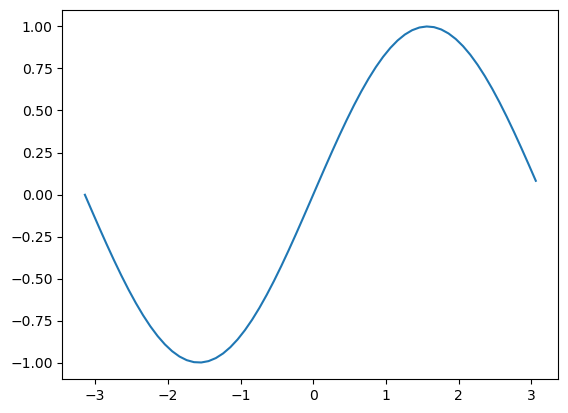

In [24]:
fig, ax = plt.subplots()

ax.plot(x,y)

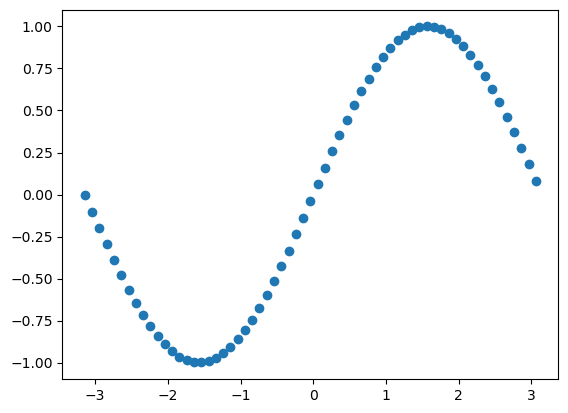

In [26]:
fig, ax = plt.subplots()

ax.scatter(x,y)

Text(0.5, 1.0, 'My plot')

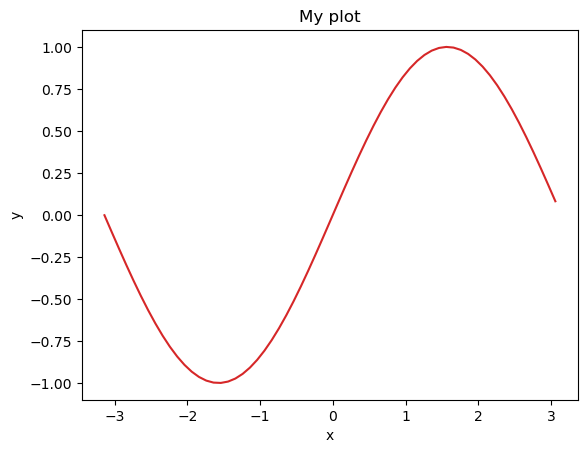

In [32]:
fig, ax = plt.subplots()

ax.plot(x,y, color='tab:red'
        )

# default named colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("My plot")


Text(0.5, 1.0, 'My plot')

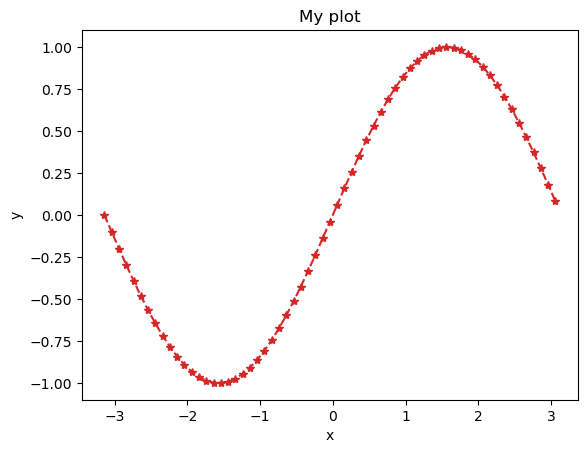

In [34]:
fig, ax = plt.subplots()

ax.plot(x,y, color='tab:red', marker='*', linestyle='--'
        )

# default named colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("My plot")


Text(1, 0.2, 'my text')

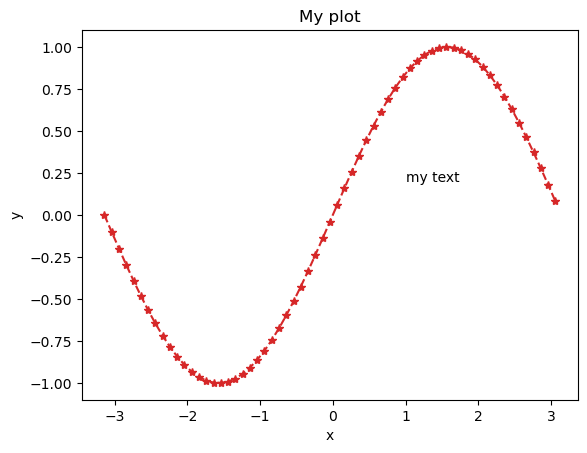

In [42]:
fig, ax = plt.subplots()

ax.plot(x,y, color='tab:red', marker='*', linestyle='--'
        )

# default named colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("My plot")
ax.annotate("my text", (1,.2))

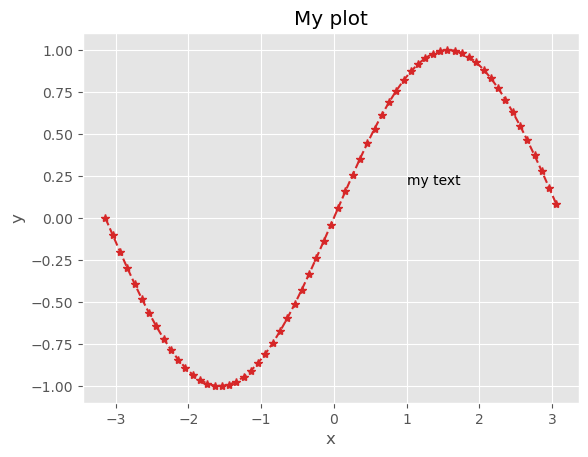

In [44]:
with plt.style.context('ggplot'):

    fig, ax = plt.subplots()

    ax.plot(x,y, color='tab:red', marker='*', linestyle='--'
            )

    # default named colors
    # https://matplotlib.org/stable/gallery/color/named_colors.html

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("My plot")
    ax.annotate("my text", (1,.2))

## Creating Multiple plots on one figure

- In matplotlib you create a figure and axis *object* that you then modify.
- This is where `set_title`, `set_xlabel`, `set_xlim` comes in
- In order to create more axis objects within a figure, you need to tell matplotlib that's what you want

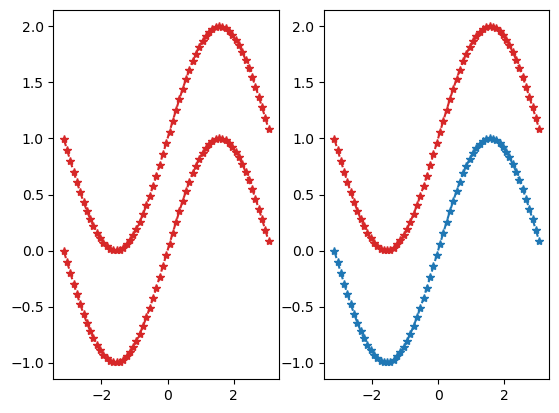

In [54]:
fig, ax = plt.subplots(1,2)

ax[0].plot(x,y, color='tab:red', marker='*', linestyle='--')
ax[1].plot(x,y, color='tab:blue', marker='*', linestyle='--')

# or in a loop
for a in ax:
    a.plot(x,y+1, color='tab:red', marker='*', linestyle='--')

Attribute Error
Attribute Error


Text(0.5, 0.98, 'My Big Figure')

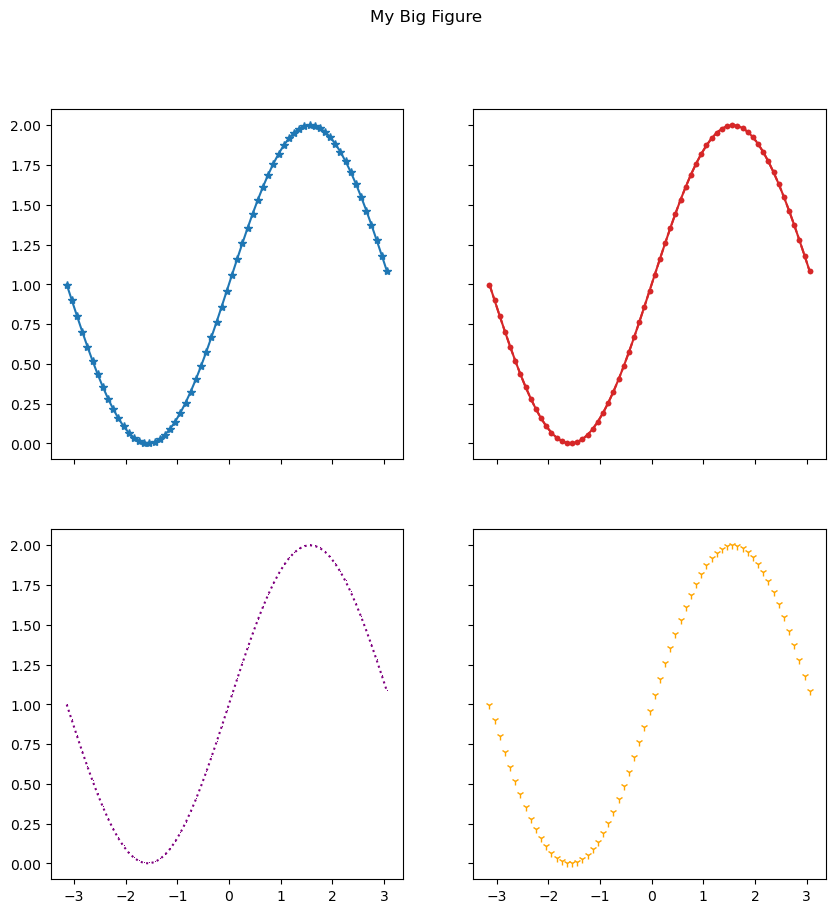

In [88]:
# Creating a grid, just creates an axis object of that size

# change the figure size
# allow sharing x and y axes
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

# ax is a now a numpy array
ax[0,0]

#  if you use the same loop, you'll get an error
for a in ax:
    try:
        a.plot(x,y+1, color='tab:red', marker='.', linestyle='-')
    except AttributeError:
        print("Attribute Error")
    
# instead index like a 2-D array
ax[0,1].plot(x,y+1, color='tab:red', marker='.', linestyle='-')

# to use a loop, use numpy's flatten
for a,l,m,c in zip(ax.flatten(), ['-', '--', ':', ' '], ['*', '.', ',', '1' ], ['tab:blue', 'tab:red', 'purple', 'orange']):
    a.plot(x,y+1, color=c, marker=m, linestyle=l)

fig.suptitle("My Big Figure")

- Matplotlib has basically any kind of visualization you want, and you can do anything with it, but `seaborn` makes things a lot easier, so we'll stop here for now.

## Plotting Pandas DataFrame

- Dataframes are just like any other data source for matplotlib, so you can do the above method. 
- But pandas has a great plotting function too, which makes visualizing data a lot more easy
- For that, we can use `plot()` and specifying `kind` or we can use the `plot` accessor

In [106]:
# create a household-year panel
multi_index = pd.MultiIndex.from_product([range(10), range(2002, 2020)], names = ['hhid', 'year'])

hh_panel = pd.DataFrame(index=multi_index, columns = ['income', 'poverty', 'consumption'], 
             data = np.array([np.random.uniform(0,100,size=180), np.random.choice([0,1], size=180), np.random.normal(size=180)]).T).reset_index()

<AxesSubplot:title={'center':'My figure'}, xlabel='year', ylabel='income'>

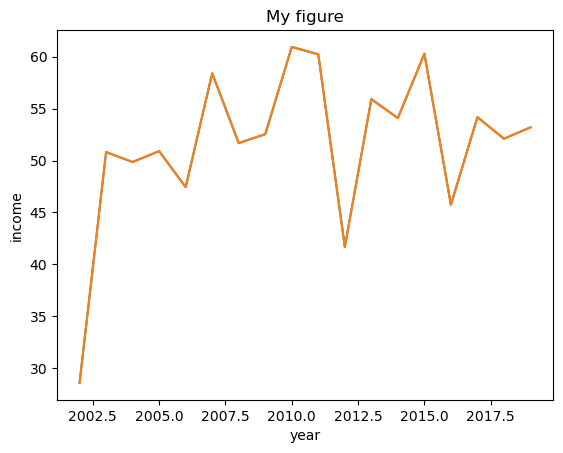

In [116]:
hh_panel.groupby('year').mean()['income'].plot(kind='line', ylabel='income', title='My figure')
hh_panel.groupby('year').mean()['income'].plot.line()


year
2002    AxesSubplot(0.125,0.11;0.775x0.77)
2003    AxesSubplot(0.125,0.11;0.775x0.77)
2004    AxesSubplot(0.125,0.11;0.775x0.77)
2005    AxesSubplot(0.125,0.11;0.775x0.77)
2006    AxesSubplot(0.125,0.11;0.775x0.77)
2007    AxesSubplot(0.125,0.11;0.775x0.77)
2008    AxesSubplot(0.125,0.11;0.775x0.77)
2009    AxesSubplot(0.125,0.11;0.775x0.77)
2010    AxesSubplot(0.125,0.11;0.775x0.77)
2011    AxesSubplot(0.125,0.11;0.775x0.77)
2012    AxesSubplot(0.125,0.11;0.775x0.77)
2013    AxesSubplot(0.125,0.11;0.775x0.77)
2014    AxesSubplot(0.125,0.11;0.775x0.77)
2015    AxesSubplot(0.125,0.11;0.775x0.77)
2016    AxesSubplot(0.125,0.11;0.775x0.77)
2017    AxesSubplot(0.125,0.11;0.775x0.77)
2018    AxesSubplot(0.125,0.11;0.775x0.77)
2019    AxesSubplot(0.125,0.11;0.775x0.77)
Name: income, dtype: object

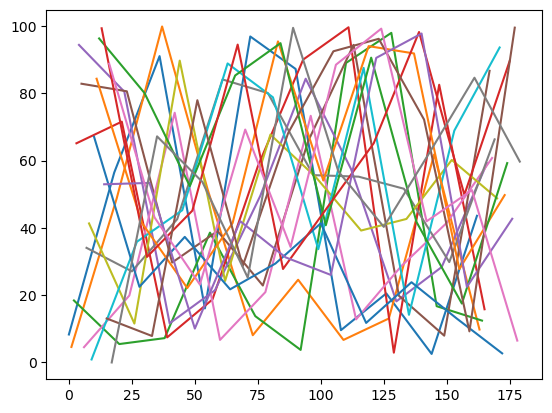

In [98]:
hh_panel.groupby('year')['income'].plot.line()

<AxesSubplot:xlabel='income', ylabel='consumption'>

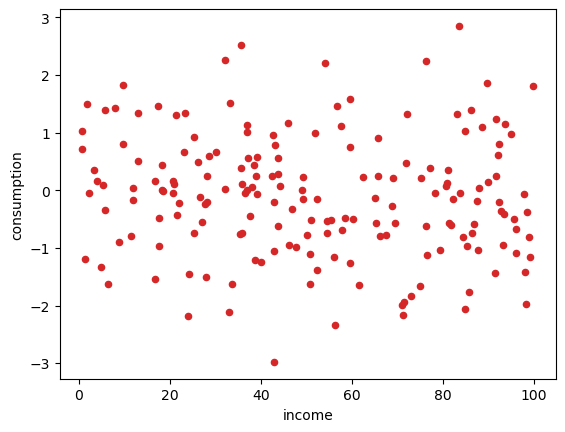

In [111]:
hh_panel.plot.scatter(x='income', y='consumption', color='tab:red')

# all the properties that we had in matplotlib apply here as well because pandas *builds* on matplotlib for its plotting API

<AxesSubplot:>

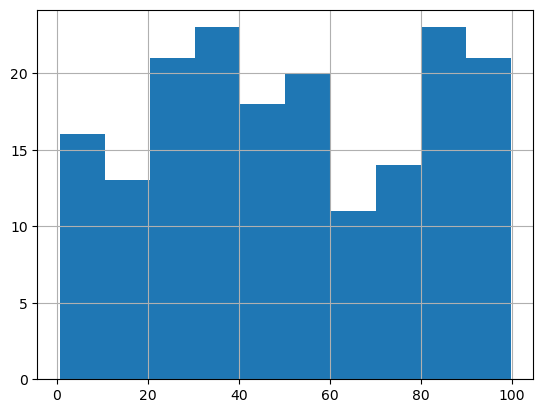

In [112]:
hh_panel['income'].hist()


- To do multiple plots, we create our figure objects and refer to them in the plot call 

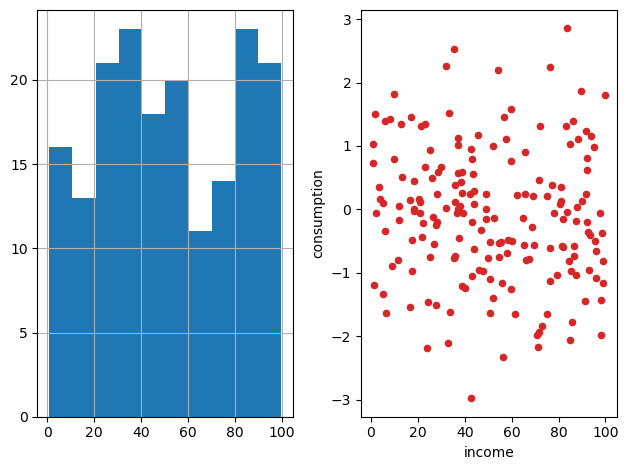

In [114]:
fig, ax  = plt.subplots(1,2)

hh_panel['income'].hist(ax=ax[0])

hh_panel.plot.scatter(x='income', y='consumption', color='tab:red', ax=ax[1])

# To get rid of overlap issues, call tight_layout

plt.tight_layout()


- Pandas has all the greatest hits of visualization and the formatting and plotting is all the same:

```
pandas.DataFrame.plot
pandas.DataFrame.plot.area
pandas.DataFrame.plot.bar
pandas.DataFrame.plot.barh
pandas.DataFrame.plot.box
pandas.DataFrame.plot.density
pandas.DataFrame.plot.hexbin
pandas.DataFrame.plot.hist
pandas.DataFrame.plot.kde
pandas.DataFrame.plot.line
pandas.DataFrame.plot.pie
pandas.DataFrame.plot.scatter
```

## Fancy Plotting with Seaborn

- If we want to make our life easier and make nice looking graphs, we can also use `seaborn`
- https://seaborn.pydata.org/
- You can look at the gallery of all the graphs that you can make.
- `seaborn` builds on `matplotlib` but just makes things easier, and visually nicer
- `seaborn` works with data that is `tidy` and long
- This means that there is no "wide parts"
    - So no "income_2000", "income_2001", etc.. 

<AxesSubplot:xlabel='income', ylabel='consumption'>

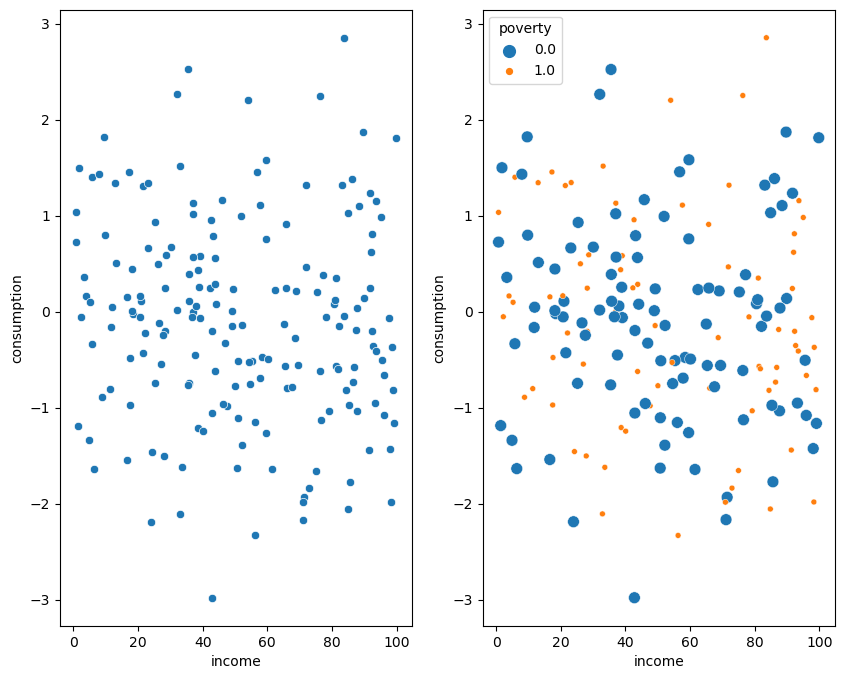

In [124]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

sns.scatterplot(x='income', y= 'consumption', data=hh_panel, ax=ax[0])

# but you can also change colors or size or style based on other variables
sns.scatterplot(x='income', y= 'consumption', data=hh_panel, ax=ax[1], hue='poverty', size='poverty')


### Heatmaps

- This is particularly great for correlations
- First we create a correlation matrix with `pandas.DataFrame.corr`

In [126]:
hh_panel[['income', 'poverty', 'consumption']].corr()

,income,poverty,consumption
income,1.000000,0.062077,-0.103691
poverty,0.062077,1.000000,-0.009323
consumption,-0.103691,-0.009323,1.000000


<AxesSubplot:>

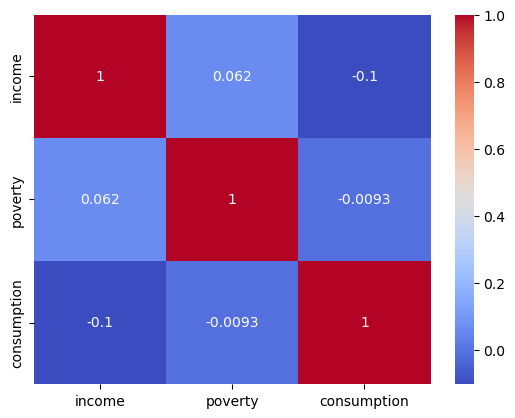

In [129]:
sns.heatmap(hh_panel[['income', 'poverty', 'consumption']].corr(), cmap='coolwarm', annot=True)

- We can show a lot of information using `pairplot` 

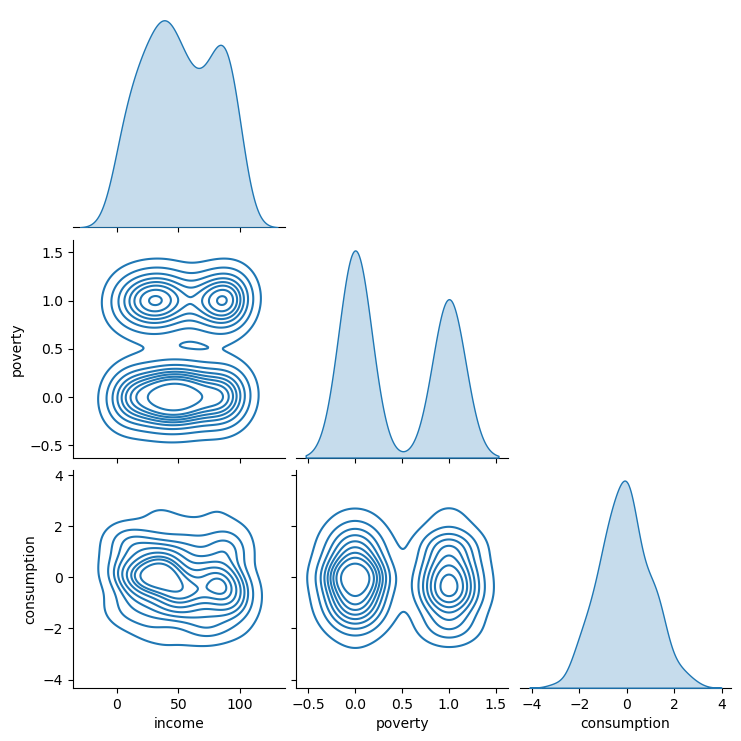

In [132]:
sns.pairplot(hh_panel[['income', 'poverty', 'consumption']], corner=True, kind='kde')

## Regplot

- We can also visualize scatters with a regression or quadratic or spline
- Using the hue, color and style parameters, we can add interesting information


In [142]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


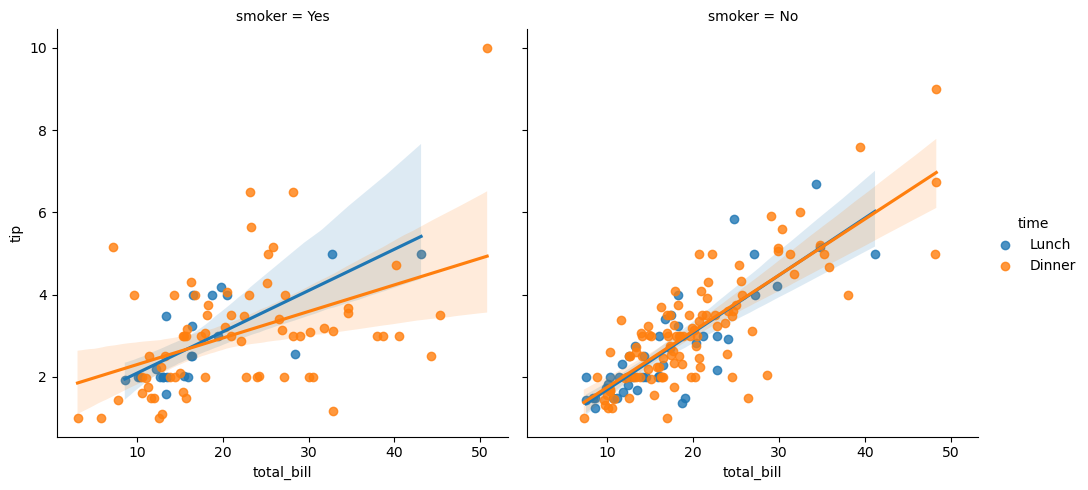

In [156]:
tips = sns.load_dataset("tips")


sns.lmplot(x='total_bill', y = 'tip', data=tips, hue='time', col='smoker', 
        #    x_partial='size', y_partial='size'
           )

## Plotly

- `Plotly` is a bit of a different API, but it allows really easy interactivity in your plots
- `Plotly` gets pretty complicated because it's using web tools underneath, but can be really useful in constructing dashboards
- We will be using `plotly_express` to make some nice interactive graphs
- But similarly to `seaborn`, it also works best with tidy data

In [161]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [163]:
px.scatter(tips, x='total_bill', y = 'tip', color='time', symbol='smoker'
        )

- Plotly is a little advanced, but it is very powerful. 
- You can even create easy animations with it (albeit mileage may vary)

In [166]:
px.scatter(hh_panel, x="income", y="consumption", animation_frame="year", animation_group="hhid",
           size="poverty", hover_name="hhid", color='poverty')

In [181]:
px.bar(hh_panel, x="hhid", y="consumption", animation_frame="year", animation_group="hhid",
            hover_name="hhid", color='hhid', )

In [169]:
pop_data = px.data.gapminder()
px.scatter(pop_data, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [174]:
pop_data = px.data.gapminder()
px.bar(pop_data, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])

## Easy Interactivity with Jupyter and `ipywidgets`

- Plotly makes interactivity really easy and cool
- But for certain things, it may require a lot of work or not what you want
- So we can use `ipywidgets`
- These widgets are really great for creating fast interactivity so you can more easily do data exploration
- Create a big dashboard of different visualizations that you can use for your needs
- This is great for own exploration or for showing something to collaborators.
- All you have to do is create a function and put a *decorator* above it.

In [190]:
def visualize_and_regress(df, x,y, hue=None):
    sns.lmplot(x=x,y=y,data=df, hue=hue)

- we can just run this function and it'll be fine:

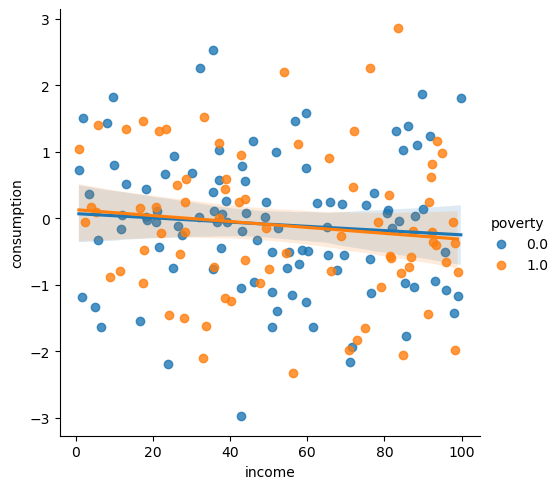

In [192]:
visualize_and_regress(hh_panel, 'income', 'consumption', hue='poverty')

- but if we specify a bit more and with a small change, we can unleash!

In [201]:
hh_panel.groupby('year')[['income', 'consumption']].describe()

income                                                                    \
      count       mean        std        min        25%        50%        75%   
year                                                                            
2002   10.0  28.582747  27.227174   1.411172   5.722895  21.680304  43.254369   
2003   10.0  50.809927  17.459975  26.067269  38.758155  51.602958  64.327804   
2004   10.0  49.855978  24.978057  11.321378  35.978018  43.926621  71.132079   
2005   10.0  50.898548  26.363209  17.588325  29.176770  50.435592  65.636875   
2006   10.0  47.436733  33.446252   7.961138  25.662969  34.534959  76.211337   
2007   10.0  58.399333  33.016591   9.749019  27.128481  69.384486  83.650076   
2008   10.0  51.678055  31.576192   8.775953  20.958014  55.036305  81.052775   
2009   10.0  52.536575  36.091531   3.979713  21.064505  49.055426  85.064092   
2010   10.0  60.939383  25.221948  16.632464  43.619118  65.844080  83.642960   
2011   10.0  60.227987  29.543732  11.757194  43.887298  64.415824  81.491293   
2012   10.0  41.681957  33.664476   0.730180  14.947362  31.965676  67.657531   
2013   10.0  55.907680  29.202692   6.376072  37.908864  58.415055  77.744053   
2014   10.0  54.088936  23.142243  28.640835  42.935206  47.913921  51.668894   
2015   10.0  60.283529  28.922958   5.811226  44.776261  54.275301  88.787351   
2016   10.0  45.738286  36.867243   0.737649  10.977554  45.504300  78.877488   
2017   10.0  54.177283  24.738653  21.561306  37.298579  49.926998  72.677717   
2018   10.0  52.098043  29.376760   5.799447  37.217833  50.496804  74.815544   
2019   10.0  53.191007  30.486119   4.905795  34.146352  40.998509  78.492539   

                consumption                                                    \
            max       count      mean       std       min       25%       50%   
year                                                                            
2002  83.119738        10.0  0.624105  1.161177 -1.186572 -0.268293  0.805424   
2003  76.520393        10.0 -0.050933  1.199990 -2.166153 -0.773795  0.241109   
2004  87.820685        10.0 -0.090750  0.876202 -1.654952 -0.637511  0.126834   
2005  95.015921        10.0  0.355932  1.027191 -1.502704 -0.396477  0.493417   
2006  97.673954        10.0  0.123742  0.900583 -1.643314 -0.103278  0.198152   
2007  98.097276        10.0  0.093548  1.348560 -1.837423 -0.470943 -0.125000   
2008  92.023196        10.0 -0.014510  1.346401 -1.771901 -0.957809 -0.164682   
2009  98.964060        10.0 -0.099295  0.516444 -0.812024 -0.553827 -0.021862   
2010  87.412539        10.0 -0.317759  1.506674 -2.979261 -0.922266 -0.377894   
2011  95.943460        10.0 -0.827760  0.721399 -2.055172 -1.203440 -0.507889   
2012  91.641863        10.0  0.180507  1.030056 -1.984153 -0.120172  0.203405   
2013  99.089379        10.0 -0.918767  0.714995 -2.187885 -1.512843 -0.704884   
2014  99.812194        10.0  0.364954  0.909869 -1.105083 -0.243112  0.350335   
2015  93.674652        10.0 -0.041896  1.164695 -2.330651 -0.395837  0.052255   
2016  98.296490        10.0 -0.450671  0.828685 -1.982168 -0.876684 -0.367039   
2017  89.877300        10.0 -0.539290  0.637103 -1.457229 -1.050255 -0.595454   
2018  92.265198        10.0 -0.196698  0.781942 -1.441185 -0.706237 -0.167097   
2019  98.412631        10.0  0.008111  1.309376 -1.621198 -0.958989 -0.177316   

                          
           75%       max  
year                      
2002  1.336893  2.522494  
2003  0.547014  2.201733  
2004  0.446693  1.129845  
2005  1.230388  1.515997  
2006  0.650064  1.431444  
2007  0.659025  2.853157  
2008  0.927321  2.263753  
2009  0.153859  0.758041  
2010  1.026559  1.581914  
2011 -0.326222 -0.020417  
2012  0.671680  1.820632  
2013 -0.487318 -0.054369  
2014  0.983360  1.811507  
2015  0.860929  1.400433  
2016 -0.053063  1.034213  
2017  0.070879  0.284869  
2018  0.076813  1.109755  
2019  0.657146  2.251344

In [203]:
@interact(
    df = fixed(hh_panel),
    x = hh_panel.columns,
    y =hh_panel.columns,
    hue=hh_panel.columns.tolist() + [None]
)
def visualize_and_regress(df, x,y, hue=None):
    sns.lmplot(x=x,y=y,data=df, hue=hue)
    if hue is not None:
        print(df.groupby(hue)[[x,y]].describe())
    else:
        print(df[[x,y]].describe())

interactive(children=(Dropdown(description='x', options=('hhid', 'year', 'income', 'poverty', 'consumption'), …

-  If you want to run something that takes time or if you want to make more than one change, you can use `interact_manual`

In [204]:
@interact_manual(
    df = fixed(hh_panel),
    x = hh_panel.columns,
    y =hh_panel.columns,
    hue=hh_panel.columns.tolist() + [None]
)
def visualize_and_regress(df, x,y, hue=None):
    sns.lmplot(x=x,y=y,data=df, hue=hue)
    if hue is not None:
        print(df.groupby(hue)[[x,y]].describe())
    else:
        print(df[[x,y]].describe())

interactive(children=(Dropdown(description='x', options=('hhid', 'year', 'income', 'poverty', 'consumption'), …

## Going to the next level with ydata_profiling

- If you're super lazy, you can just have ydata output a data report for you with everything you need

In [206]:
ProfileReport(hh_panel)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exercises

Check the docs here: https://seaborn.pydata.org/index.html

1. Use `hh_panel` to create a boxplot of income with seaborn

2. Create a jointplot with a regression on consumption and income



## Recap

- We learned about matplotlib, seaborn, pandas plotting, plotly for visualization
- ipywidgets can be helpful if we want to explore some data
- Things can be made even easier with profiling tools
- This is a really a drop in the bucket in terms of visualization. 
- This is just to get you started.
- The important thing is that your visualizations should give needed information, but not too much...
- When making graphs, make sure to label axes and make a title that makes sense
- A cursory glance should be enough to get an idea of what you're trying to tell with the visualization
